In [1]:
# Importing Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Getting the dataset
df = pd.read_csv(r"Dataset\train.csv")

In [3]:
# Display Dataset
df.head()

date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10

In [4]:
# Display Dataset
df.tail()

date  store  item  sales
912995  2017-12-27     10    50     63
912996  2017-12-28     10    50     59
912997  2017-12-29     10    50     74
912998  2017-12-30     10    50     62
912999  2017-12-31     10    50     82

Data Cleaning

In [5]:
# Count the dataset
df.count()

date     913000
store    913000
item     913000
sales    913000
dtype: int64

In [6]:
# Check is there any null values
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [7]:
# Based on the dataset there is a duplicate means drop the duplicated values from the dataset
df.drop_duplicates()

date  store  item  sales
0       2013-01-01      1     1     13
1       2013-01-02      1     1     11
2       2013-01-03      1     1     14
3       2013-01-04      1     1     13
4       2013-01-05      1     1     10
...            ...    ...   ...    ...
912995  2017-12-27     10    50     63
912996  2017-12-28     10    50     59
912997  2017-12-29     10    50     74
912998  2017-12-30     10    50     62
912999  2017-12-31     10    50     82

[913000 rows x 4 columns]

In [3]:
# Convert Date to To_datetime
df['date'] = pd.to_datetime(df['date'])

EDA

ValueError: The 'color' keyword argument must have one color per dataset, but 4 datasets and 1 colors were provided

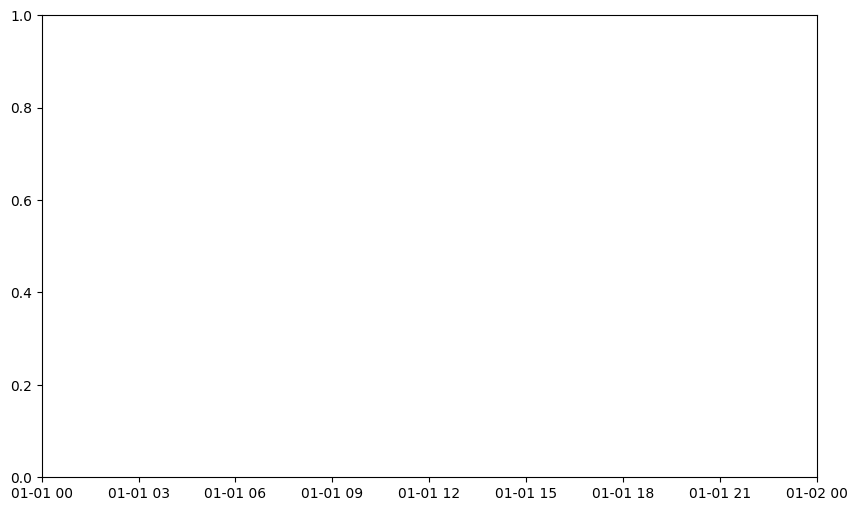

In [7]:
# Visual Plot
plt.figure(figsize=(10,6))
plt.hist(df,bins=30,color='yellow')
# plt.plot(df['date'], df['sales'])
plt.show()

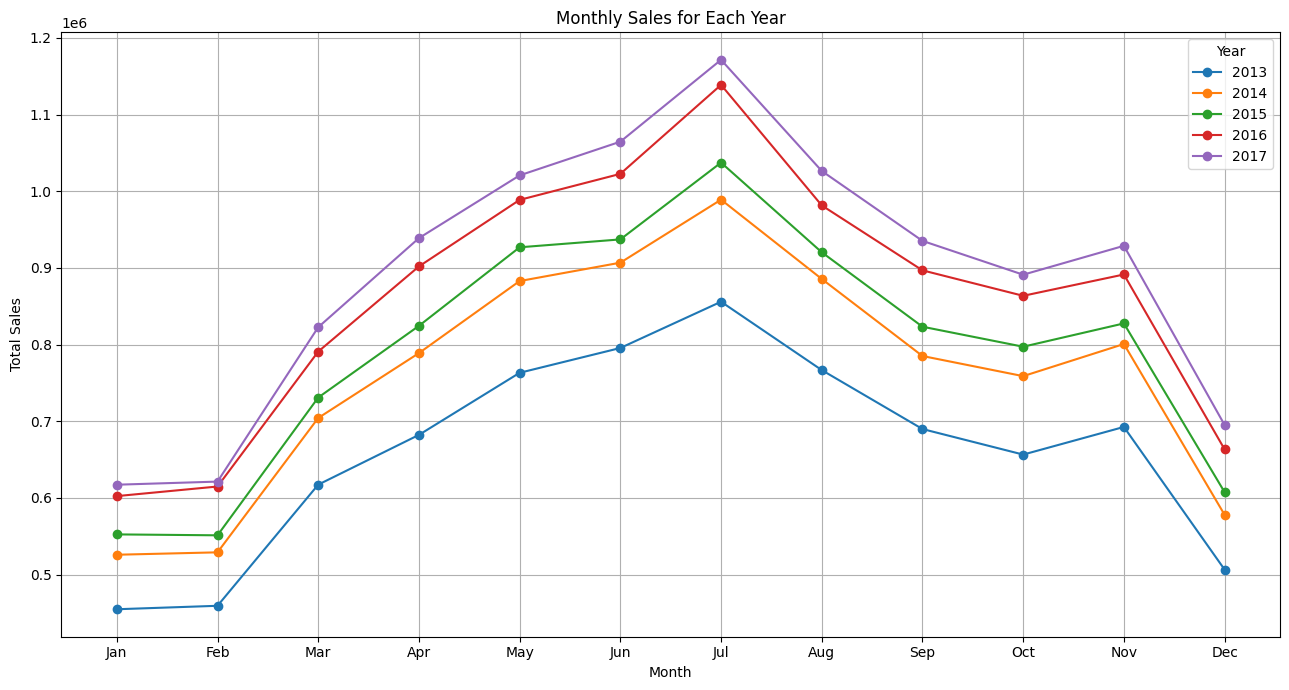

In [10]:
# Month wise sales on each year

df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.strftime('%b')

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_sales = df.groupby(['Year', 'Month'])['sales'].sum().reset_index()

monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'],categories=month_order,ordered=True)

monthly_sales = monthly_sales.sort_values(['Year', 'Month'])

plt.figure(figsize=(13, 7))
for year in monthly_sales['Year'].unique():
    year_data = monthly_sales[monthly_sales['Year'] == year]
    plt.plot(year_data['Month'], year_data['sales'], marker='o', label=str(year))

# Plot the sales
plt.title('Monthly Sales for Each Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
# Describe the dataset
df['sales'].describe()

count    913000.000000
mean         52.250287
std          28.801144
min           0.000000
25%          30.000000
50%          47.000000
75%          70.000000
max         231.000000
Name: sales, dtype: float64

In [12]:
# Occurs memory error so group the sales from monthly and test the adfuller

from statsmodels.tsa.stattools import adfuller

# Aggregate sales monthly
monthly_sales = df.set_index('date')['sales'].resample('ME').sum()

# Run ADF test on aggregated monthly data
result = adfuller(monthly_sales)

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Interpretation
if result[1] <= 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")


ADF Statistic: -5.247518850016353
p-value: 7.026495391574688e-06
Critical Values:
   1%: -3.5745892596209488
   5%: -2.9239543084490744
   10%: -2.6000391840277777
The series is stationary.


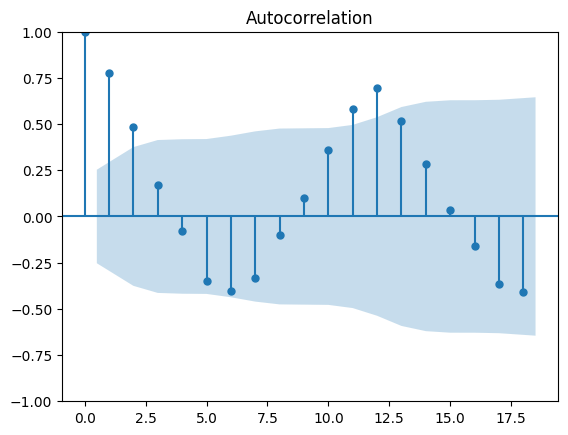

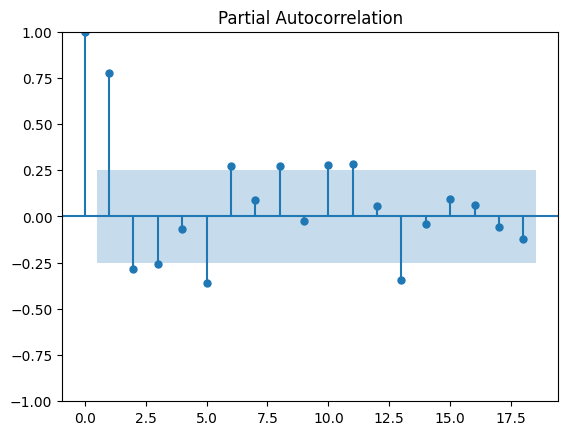

In [13]:
# plot the ACF & PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(monthly_sales)
plot_pacf(monthly_sales)
plt.show()


In [ ]:
# importing model
import statsmodels
print(statsmodels.__version__)

0.14.5


In [15]:
# importing SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [16]:
# Define the model (you can adjust the order if needed)
model = SARIMAX(monthly_sales,order=(1, 1, 1),seasonal_order=(1, 1, 1, 12))
results = model.fit()
print(results.summary())

c:\Users\jagat\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\jagat\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\jagat\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                     SARIMAX Results                                      
Dep. Variable:                              sales   No. Observations:                   60
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -515.602
Date:                            Thu, 30 Oct 2025   AIC                           1041.205
Time:                                    06:59:28   BIC                           1050.455
Sample:                                01-31-2013   HQIC                          1044.686
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7367      1.080      0.682      0.495      -1.380       2.853
ma.L1         -0.7491      1.050   

In [17]:
# Fit forecast model for 6 months prediciton
forecast = results.forecast(steps=6)
print(forecast)

2018-01-31    6.586835e+05
2018-02-28    6.613971e+05
2018-03-31    8.667649e+05
2018-04-30    9.832364e+05
2018-05-31    1.066579e+06
2018-06-30    1.110273e+06
Freq: ME, Name: predicted_mean, dtype: float64


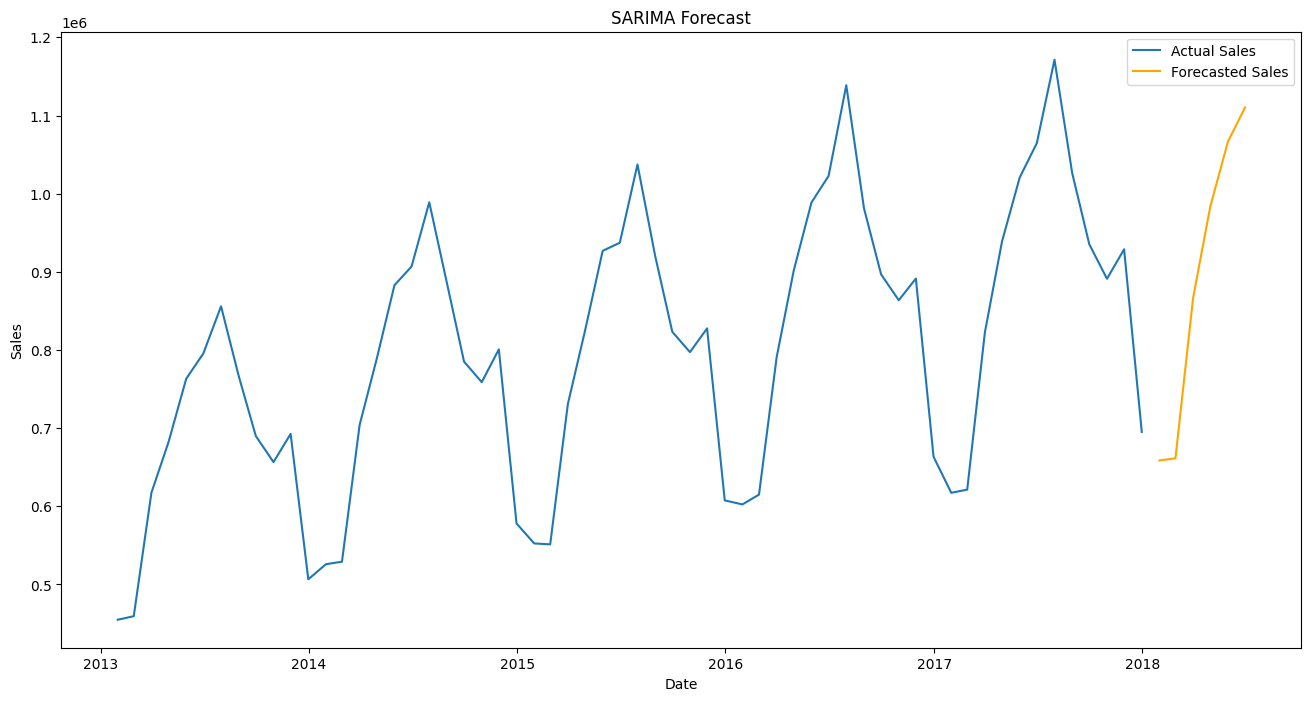

In [18]:
# plot the prediction
plt.figure(figsize=(16,8))
plt.plot(monthly_sales, label='Actual Sales')
plt.plot(forecast, label='Forecasted Sales', color='Orange')
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


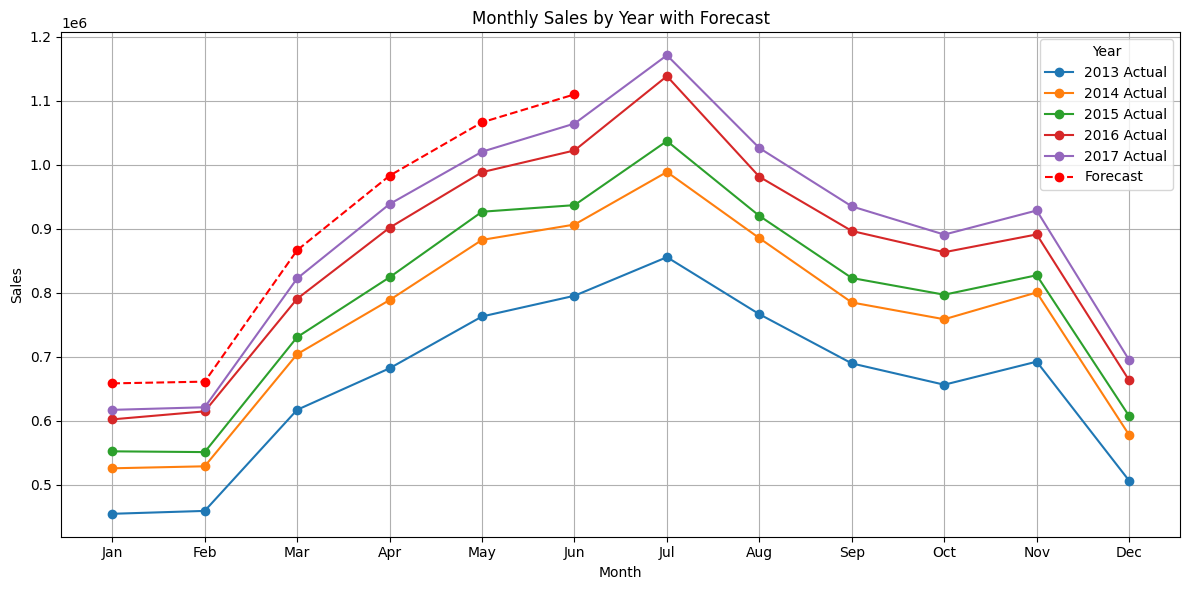

In [19]:
# Convert monthly_sales to DataFrame
monthly_df = monthly_sales.reset_index()
monthly_df['Year'] = monthly_df['date'].dt.year
monthly_df['Month'] = monthly_df['date'].dt.strftime('%b')
monthly_df.rename(columns={'sales': 'sales'}, inplace=True)

# Prepare forecast DataFrame
forecast_df = forecast.to_frame(name='Forecast')
forecast_df.index.name = 'date'
forecast_df.reset_index(inplace=True)
forecast_df['Year'] = forecast_df['date'].dt.year
forecast_df['Month'] = forecast_df['date'].dt.strftime('%b')

# Plot
plt.figure(figsize=(12, 6))
for year in monthly_df['Year'].unique():
    data = monthly_df[monthly_df['Year'] == year]
    plt.plot(data['Month'], data['sales'], marker='o', label=f'{year} Actual')
plt.plot(forecast_df['Month'], forecast_df['Forecast'],color='red', linestyle='--', marker='o', label='Forecast')
plt.title('Monthly Sales by Year with Forecast')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()


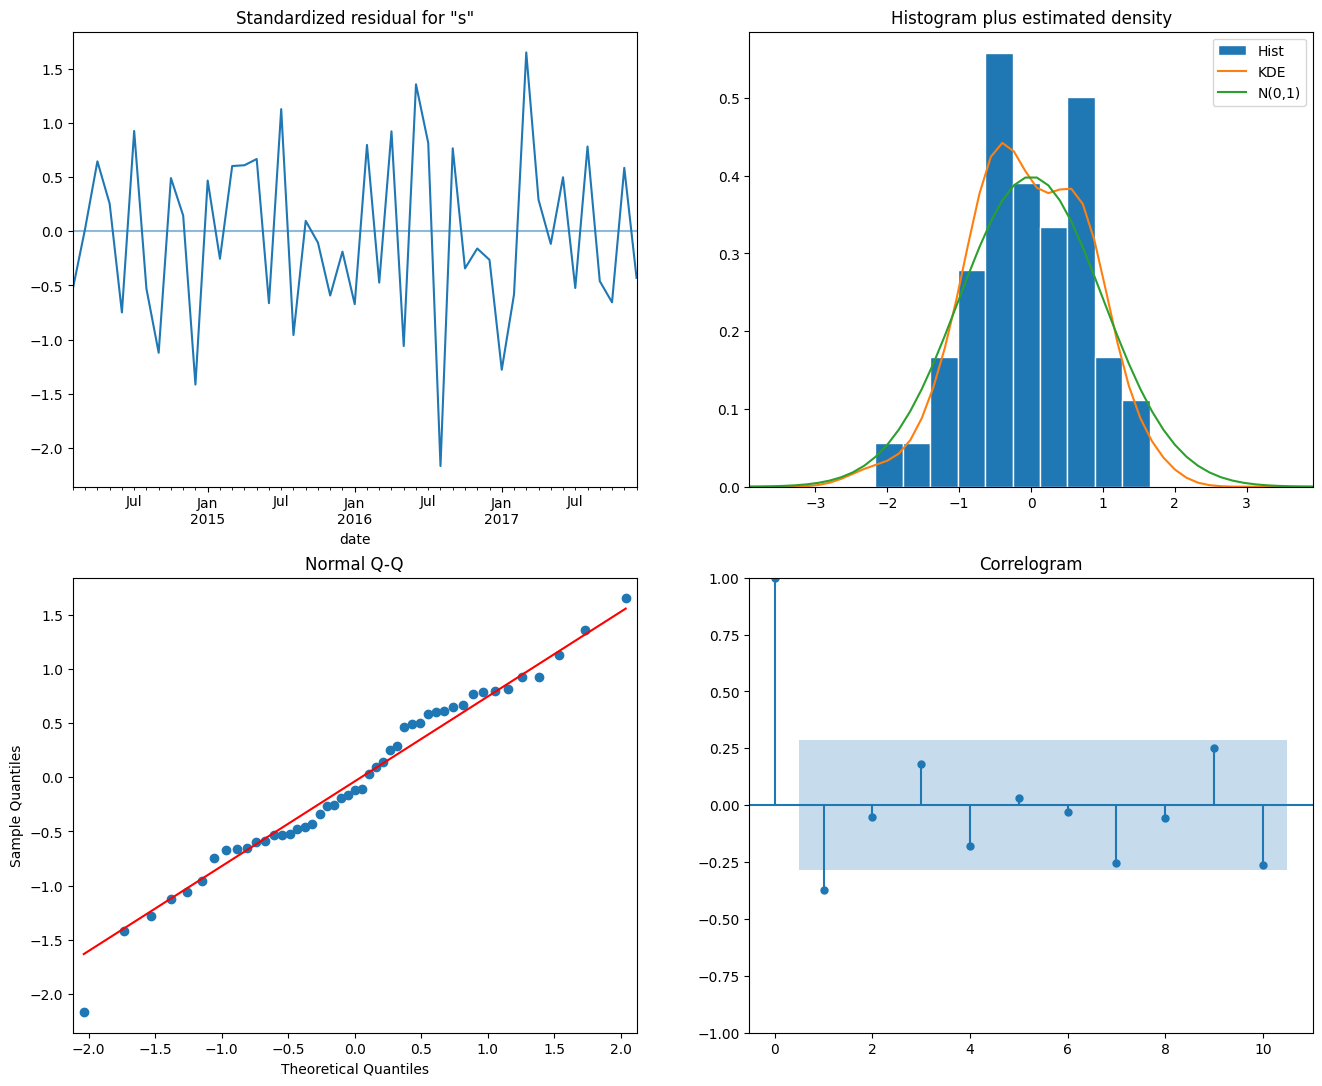

In [20]:
# Test the model (Diagnostics)
results.plot_diagnostics(figsize=(16,13))
plt.show()

In [ ]:
# Test the model Accuracy
fitted_values = results.fittedvalues
actual_values = monthly_sales

comparison_df = pd.DataFrame({
    'Actual': actual_values,
    'Fitted': fitted_values
})


mae = np.mean(np.abs(comparison_df['Actual'] - comparison_df['Fitted']))
mse = np.mean((comparison_df['Actual'] - comparison_df['Fitted']) ** 2)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((comparison_df['Actual'] - comparison_df['Fitted']) / comparison_df['Actual'])) * 100
accuracy = 100 - mape
print(f"Model Evaluation Metrics:")
print(f"MAE  : {mae:.2f}") # Mean Absolute Error
print(f"MSE  : {mse:.2f}") # Mean Squared Error
print(f"RMSE : {rmse:.2f}") # Root Mean Squared Error
print(f"MAPE : {mape:.2f}%") # Mean Absolute Percentage Error
print(f"Accuracy : {accuracy:.2f}%")


Model Evaluation Metrics:
MAE  : 38207.76
MSE  : 8807683764.09
RMSE : 93849.26
MAPE : 6.40%
Accuracy : 93.60%


# Test CSV for the prediction

In [22]:
# Load test.csv
test_df = pd.read_csv(r"Dataset\test.csv")

test_df['date'] = pd.to_datetime(test_df['date'])
test_df['Year'] = test_df['date'].dt.year
test_df['Month'] = test_df['date'].dt.month
test_df = test_df[(test_df['Year'] == 2018) & (test_df['Month'].isin([1, 2, 3]))]
test_months = pd.date_range(start='2018-01-31', end='2018-03-31', freq='M')


C:\Users\jagat\AppData\Local\Temp\ipykernel_24340\1314840090.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  test_months = pd.date_range(start='2018-01-31', end='2018-03-31', freq='M')


In [23]:
# Forecast next 3 months
forecast_3m = results.forecast(steps=3)
forecast_3m = forecast_3m.to_frame(name='Forecast')
forecast_3m.index.name = 'date'
forecast_3m.reset_index(inplace=True)


In [24]:
print(forecast_3m.columns)

Index(['date', 'Forecast'], dtype='object')


In [25]:
# Monthly sales
monthly_sales.index = pd.to_datetime(monthly_sales.index)
monthly_sales.index.freq = 'M'

forecast_3m = results.forecast(steps=3)

start_date = monthly_sales.index[-1] + pd.offsets.MonthEnd(1)
forecast_3m.index = pd.date_range(start=start_date, periods=3, freq='M')

forecast_3m = forecast_3m.to_frame(name='Forecast').reset_index().rename(columns={'index': 'date'})
print(forecast_3m)

        date       Forecast
0 2018-01-31  658683.547663
1 2018-02-28  661397.120370
2 2018-03-31  866764.929079


C:\Users\jagat\AppData\Local\Temp\ipykernel_24340\1688886530.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales.index.freq = 'M'
C:\Users\jagat\AppData\Local\Temp\ipykernel_24340\1688886530.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_3m.index = pd.date_range(start=start_date, periods=3, freq='M')


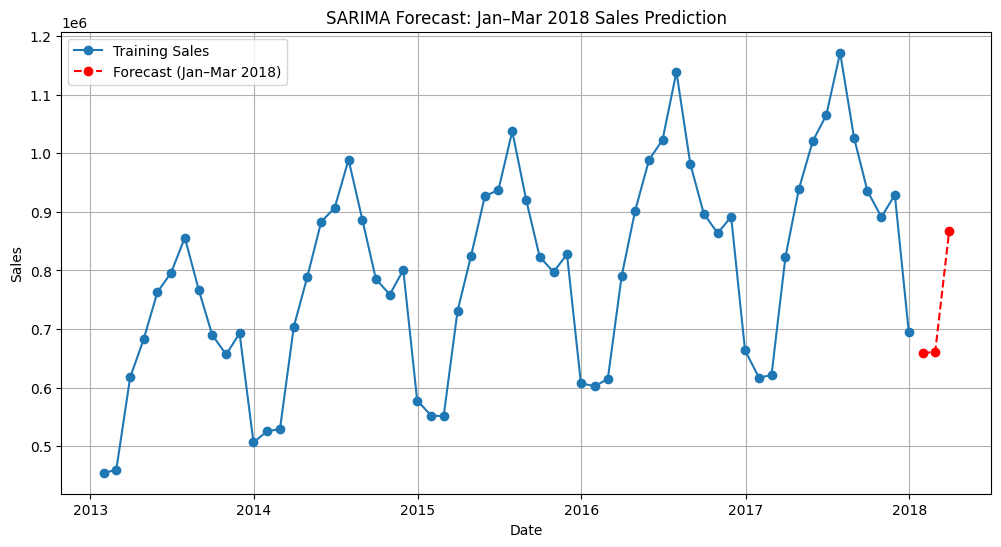

In [26]:
# Plot training data and forecast together
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Training Sales', marker='o')
plt.plot(forecast_3m['date'], forecast_3m['Forecast'], 'ro--', label='Forecast (Jan–Mar 2018)')

plt.title('SARIMA Forecast: Jan–Mar 2018 Sales Prediction')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\jagat\AppData\Local\Temp\ipykernel_24340\1860182114.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro--" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(forecast_3m['date'], forecast_3m['Forecast'], 'ro--', marker='o', label='Predicted Sales')


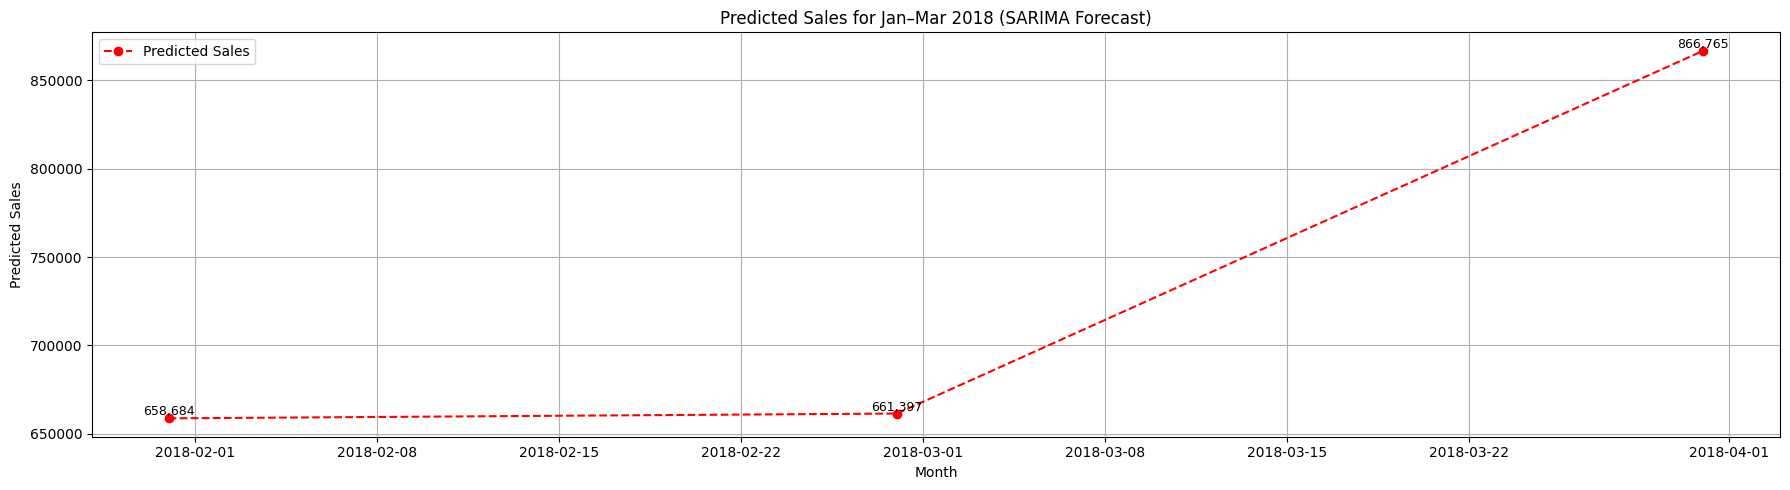

In [27]:
# Plot only the forecasted 3 months
plt.figure(figsize=(18, 5))
plt.plot(forecast_3m['date'], forecast_3m['Forecast'], 'ro--', marker='o', label='Predicted Sales')

plt.title('Predicted Sales for Jan–Mar 2018 (SARIMA Forecast)')
plt.xlabel('Month')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.legend()
for x, y in zip(forecast_3m['date'], forecast_3m['Forecast']):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=9, color='black')
plt.tight_layout()
plt.show()

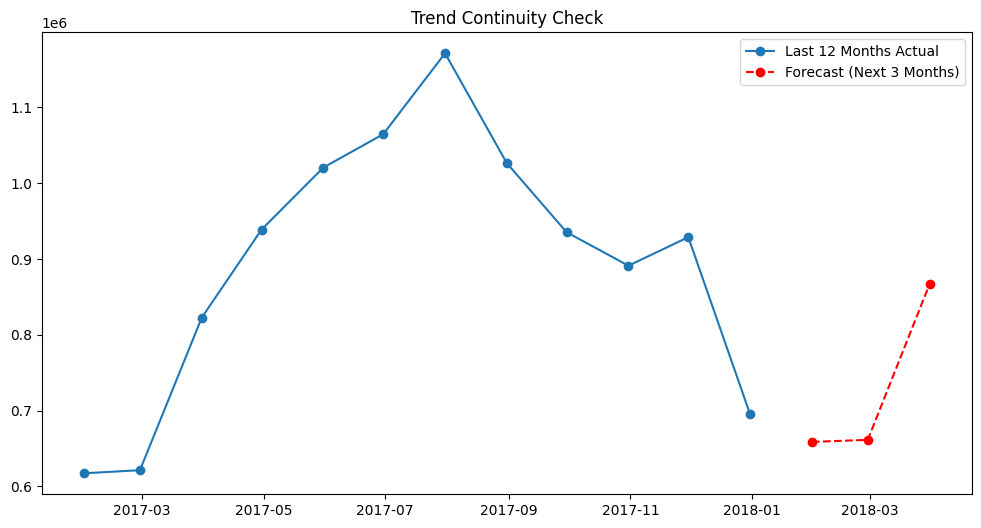

In [28]:
# plot last 12 months with forecast
plt.figure(figsize=(12,6))
plt.plot(monthly_sales[-12:], label='Last 12 Months Actual', marker='o')
plt.plot(forecast_3m['date'], forecast_3m['Forecast'], 'ro--', label='Forecast (Next 3 Months)')
plt.legend()
plt.title('Trend Continuity Check')
plt.show()

# Export the Train Dataset with Prediction

In [ ]:
# Create DataFrame for Fitted (Train) Predictions
train_export = monthly_sales.copy()
train_export = train_export.to_frame(name='Actual_Sales')
train_export['Predicted_Sales'] = results.fittedvalues
train_export['Type'] = 'Train'

# Create DataFrame for Forecast (Future Predictions)
forecast_export = forecast.to_frame(name='Predicted_Sales')
forecast_export['Actual_Sales'] = None
forecast_export['Type'] = 'Forecast'

# Combine both
final_export = pd.concat([train_export, forecast_export])

# Reset index and clean up
final_export.reset_index(inplace=True)
final_export.rename(columns={'index': 'Date'}, inplace=True)

# Export to CSV
final_export.to_csv(r"Dataset\SARIMA_Predictions.csv", index=False)

print("SARIMA predictions exported successfully to 'Dataset\\SARIMA_Predictions.csv'")
print(final_export.tail(10))

✅ SARIMA predictions exported successfully to 'Dataset\SARIMA_Predictions.csv'
         date Actual_Sales  Predicted_Sales      Type
56 2017-09-30       935263     9.431113e+05     Train
57 2017-10-31       891160     9.023409e+05     Train
58 2017-11-30       928837     9.188597e+05     Train
59 2017-12-31       695170     7.024964e+05     Train
60 2018-01-31         None     6.586835e+05  Forecast
61 2018-02-28         None     6.613971e+05  Forecast
62 2018-03-31         None     8.667649e+05  Forecast
63 2018-04-30         None     9.832364e+05  Forecast
64 2018-05-31         None     1.066579e+06  Forecast
65 2018-06-30         None     1.110273e+06  Forecast


# Export the test dataset with prediction

In [ ]:

# Convert training data (monthly_sales) to DataFrame
train_export = monthly_sales.copy()
train_export = train_export.to_frame(name='Actual_Sales')
train_export['Predicted_Sales'] = results.fittedvalues
train_export['Type'] = 'Train'

# Prepare forecast DataFrame (next 3 months)
forecast_export = forecast_3m.copy()
forecast_export = forecast_export.rename(columns={'Forecast': 'Predicted_Sales'})
forecast_export['Actual_Sales'] = None
forecast_export['Type'] = 'Forecast'

# Combine both
final_export = pd.concat([train_export, forecast_export.set_index('date')])

# Reset index and clean up
final_export.reset_index(inplace=True)
final_export.rename(columns={'index': 'Date'}, inplace=True)

# Export to CSV
final_export.to_csv(r"Dataset\SARIMA_Train_Forecast.csv", index=False)

print("Dataset with predictions exported successfully to 'Dataset\\SARIMA_Train_Forecast.csv'")
print(final_export.tail(10))


✅ Dataset with predictions exported successfully to 'Dataset\SARIMA_Train_Forecast.csv'
         date Actual_Sales  Predicted_Sales      Type
53 2017-06-30      1064624     1.056130e+06     Train
54 2017-07-31      1171393     1.180317e+06     Train
55 2017-08-31      1026403     1.013067e+06     Train
56 2017-09-30       935263     9.431113e+05     Train
57 2017-10-31       891160     9.023409e+05     Train
58 2017-11-30       928837     9.188597e+05     Train
59 2017-12-31       695170     7.024964e+05     Train
60 2018-01-31         None     6.586835e+05  Forecast
61 2018-02-28         None     6.613971e+05  Forecast
62 2018-03-31         None     8.667649e+05  Forecast
